In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model

# Load training and testing data
X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1]
y_traindf = pd.read_csv('y_train.csv')
X_traindf = pd.read_csv('X_train.csv')
X_testdf = pd.read_csv('X_test.csv')
# Lets have all the variables in the same dataframe
df = pd.read_csv('X_train.csv')
df['PRP'] = y_traindf['PRP']


#Final export

#test_header = "Id,PRP"
#n_points = X_test.shape[0]
#y_pred_pp = np.ones((n_points, 2))
#y_pred_pp[:, 0] = range(n_points)
#y_pred_pp[:, 1] = predictions
#np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
#           header=test_header, comments="").
    

**Note that it might be a good idea to transform one or more features into new features using basis functions. 
For instance, could the minimum and maximum memory features meaningfully be combined to one?**

Hyphotesis
==

- Combine other variables
- Try with the mean of MMAX and MMIN. Apply linear regression
- Calculate loss
- Cross validation. Divide train in 80%train 20%test
- Expected, covariance


In [ ]:
# Declare variables
MYCT = X_train[:,0]
MMIN = X_train[:,1]
MMAX = X_train[:,2]
CACH = X_train[:,3]
CHMIN = X_train[:,4]
CHMAX = X_train[:,5]

**What variables should we consider? Are all of them important? Which ones are more correlated with the CPU performance?**
==

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**SIMPLE LINEAR REGRESSION WITHOUT NORMALIZATION AND WITH ALL THE VARIABLES**
==

In [ ]:
#Easy Linear regression. Values are negative so is not correct. We need to normalize it first to find the linear relation.
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)

In [ ]:
predictions = regr.predict(X_test)
print(predictions)

**NORMALIZATION WITH LOG. SOME VALUES GIVE INFINITE BECAUSE LOG(0)**
==

In [ ]:
norm_x = X_train/np.linalg.norm(X_train)
normlog_x = np.log(X_train)
print(normlog_x)

**Using a DecisionTreeRegression Library**
==

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model
model = DecisionTreeRegressor()

# Fit model
model.fit(X_train, y_train)

In [ ]:
predictions = (model.predict(X_test))

**Linear model without library. With matrixes. It gives the same result**
==

In [ ]:
X = np.c_[np.ones_like(y_train), X_train]
t = y_train

In [ ]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)
X_test.shape[0]


In [ ]:
testX = np.c_[np.ones(X_test.shape[0]), X_test]
testt = np.dot(testX,w)

In [ ]:
testt

**Transformation to log and linear regression**
==
** BEST RESULT YET **
==

In [ ]:
X_traindf2 = X_traindf.drop('MYCT', 1)
X_testdf2 = X_testdf.drop('MYCT', 1)
#We change the 0 value to 0.00001 so we can use LOG
X_traindf2[X_traindf2==0] = 0.00001
X_testdf2[X_testdf2==0] = 0.00001
ylog = np.log(df['PRP'])
xtrainlog = np.log(X_traindf2)
xtestlog = np.log(X_testdf2)

In [ ]:
X = np.c_[np.ones_like(ylog), xtrainlog, xtrainlog**2]
t = ylog

In [ ]:
# Apply linear regression
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)

In [ ]:
testX = np.c_[np.ones(xtestlog.shape[0]), xtestlog, xtestlog**2]
testt = np.dot(testX,w)
testt.shape[0]
print(xtestlog.shape)

In [ ]:
# Undo logarithm to obtain real values
import math
predictions = []
for i in range(0,testt.shape[0]):
    predictions.append(math.exp( testt[i]))
    
    
myarray = np.asarray(predictions)
print(myarray)

In [ ]:
test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = myarray

np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")

**Transformation to log and linear regression but QUADRATIC**
==

In [ ]:
X_traindf2 = X_traindf
X_testdf2 = X_testdf
X_traindf2[X_traindf2==0] = 0.00001
X_testdf2[X_testdf2==0] = 0.00001
ylog = np.log(df['PRP'])
xtrainlog = np.log(X_traindf2)
xtestlog = np.log(X_testdf2)

In [ ]:
xtrainlogsq = xtrainlog**2
X = np.c_[np.ones_like(ylog), xtrainlog, xtrainlogsq]
t = ylog

In [ ]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)

In [ ]:
testX = np.c_[np.ones(xtestlog.shape[0]), xtestlog, xtestlog**2]
testt = np.dot(testX,w)
testt.shape[0]
print(xtestlog.shape)

In [ ]:
import math
predictions = []
for i in range(0,testt.shape[0]):
    predictions.append(math.exp( testt[i]))
    
    
myarray = np.asarray(predictions)
print(myarray)

Observing relation between INDEPENDENT variables
==

We can see that MMAX and MMIN in LOG format are linearly dependent. Calculate mean of them

In [ ]:
sns.set()
cols = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
sns.pairplot(xtrainlog[cols], size = 2.5)
plt.show();

**Combine MMIN and MMAX to MMEAN and solve MULTICOLLINEARITY**
==

In [57]:
X_testdf3 = X_testdf
X_testdf3[X_testdf3 == 0] = 0.00001

df = df[df.CHMIN != 0]
df = df[df.CHMAX != 0]
df = df[df.CACH != 0]


#X_traindf3 = (X_traindf3 - X_traindf3.mean())/X_traindf3.std()

ylog = np.log(df['PRP'])
X_trainlog = np.log(df.drop('PRP', 1))
X_testlog = np.log(X_testdf3)


X_trainlog['MMEAN'] = (X_trainlog["MMAX"] + X_trainlog["MMIN"])/2
X_trainlog = X_trainlog.drop('MMAX', 1)
X_trainlog = X_trainlog.drop('MMIN', 1)

X_testlog['MMEAN'] = (X_testlog["MMAX"] + X_testlog["MMIN"])/2
X_testlog = X_testlog.drop('MMAX', 1)
X_testlog = X_testlog.drop('MMIN', 1)
print(X_testlog)

xtrainlogsq = X_trainlog**2
X = np.c_[np.ones_like(ylog), X_trainlog, xtrainlogsq]
t = ylog

XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)

testX = np.c_[np.ones(X_testlog.shape[0]), X_testlog, X_testlog**2]
testt = np.dot(testX,w)
testt.shape[0]
#print(xtestlog.shape)

import math
predictions = []
for i in range(0,testt.shape[0]):
    predictions.append(math.exp( testt[i]))
    
    
myarray = np.asarray(predictions)
print(myarray)

#xtrainlog["PRP"] = ylog
#xtrainlog = (xtrainlog - xtrainlog.mean())/xtrainlog.std()
#xtrainlog
#xtestlog = (xtestlog - xtestlog.mean())/xtestlog.std()

        MYCT       CACH      CHMIN      CHMAX      MMEAN
0   4.094345   4.174387   0.000000   2.079442   8.294050
1   5.799093 -11.512925   0.693147   1.386294   7.457061
2   3.912023   3.401197   2.484907   3.178054   8.564077
3   3.258097   4.158883   2.079442   3.465736   9.680344
4   4.248495   2.079442   1.791759   2.079442   8.843356
5   5.799093 -11.512925   0.000000   0.693147   7.254329
6   5.192957   2.772589   0.000000   1.791759   8.640623
7   7.313220 -11.512925 -11.512925 -11.512925   6.775773
8   4.941642   3.465736   0.000000   3.988984   8.987197
9   3.871201   3.465736   2.079442   3.178054   9.189929
10  4.890349   2.197225   1.098612   2.484907   7.947476
11  3.401197   5.545177   2.772589   3.178054  10.026918
12  4.941642   2.772589   0.000000   1.098612   8.294050
13  4.077537   4.158883   2.484907   3.178054   9.333770
14  3.258097   4.158883   2.079442   3.178054  10.026918
15  4.941642 -11.512925   1.386294   2.079442   7.947476
16  4.584967   3.465736   0.693

In [ ]:
sns.set()
cols = ['MYCT', 'CACH', 'CHMIN', 'CHMAX', 'MMEAN']
sns.pairplot(X_trainlog[cols], size = 2.5)
plt.show();
print(X_testlog)

**STUFF TO TRY**
==

- Different ways to solve multicollinearity
- How to normalize
- LOG transform

In [58]:



test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = predictions
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")

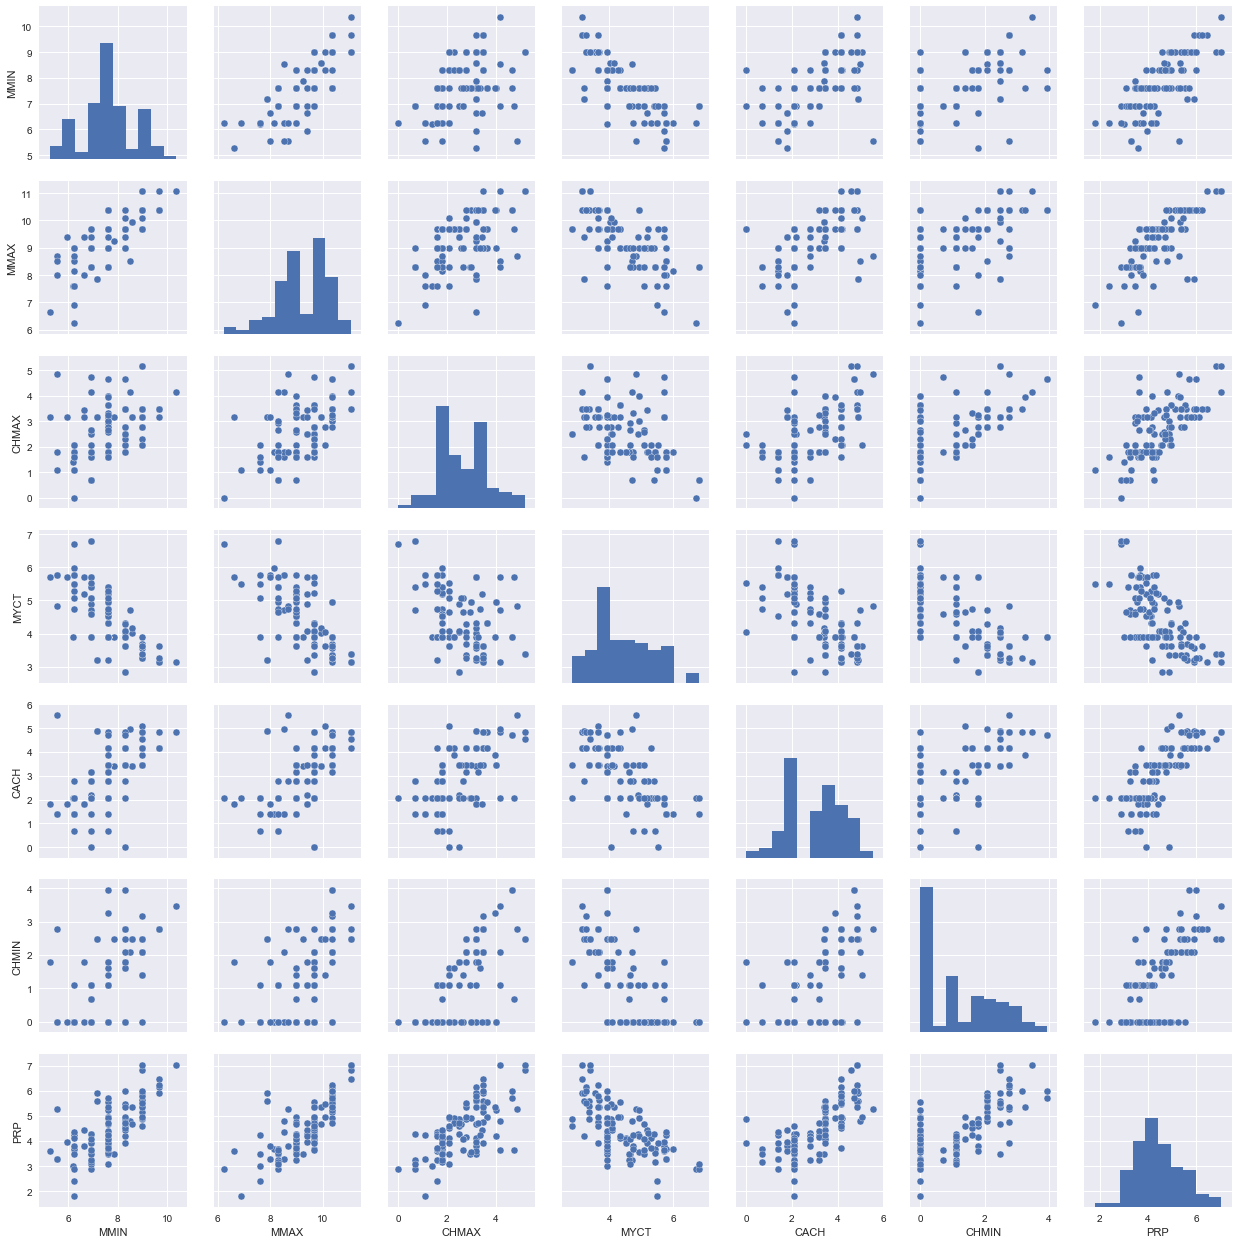

In [41]:

dflog = np.log(df)
sns.set()
cols = ['MMIN', 'MMAX', 'CHMAX', 'MYCT', 'CACH', 'CHMIN', 'PRP']
sns.pairplot(dflog[cols], size = 2.5)
plt.show();